In [35]:
import pandas as pd

In [36]:
df = pd.read_csv(r"E:\elevatetrsest\dataset\price_wheat_daily.csv")

In [37]:
df.head()

,date,district_id,district_name,commodity_name,state_name,avg_modal_price,avg_min_price,avg_max_price,calculationType,change
0,2025-03-07,497,Nandurbar,Wheat,Maharashtra,2673.0,2525.5,2716.00,Daily,100.5
1,2025-03-06,497,Nandurbar,Wheat,Maharashtra,2572.5,2470.0,2710.50,Daily,-61.5
2,2025-03-05,497,Nandurbar,Wheat,Maharashtra,2634.0,2500.0,2740.00,Daily,147.5
3,2025-03-04,497,Nandurbar,Wheat,Maharashtra,2486.5,2390.5,2628.75,Daily,-238.5
4,2025-03-03,497,Nandurbar,Wheat,Maharashtra,2725.0,2492.0,2778.00,Daily,-31.5


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             30501 non-null  object 
 1   district_id      30501 non-null  int64  
 2   district_name    30501 non-null  object 
 3   commodity_name   30501 non-null  object 
 4   state_name       30501 non-null  object 
 5   avg_modal_price  30501 non-null  float64
 6   avg_min_price    30501 non-null  float64
 7   avg_max_price    30501 non-null  float64
 8   calculationType  30501 non-null  object 
 9   change           30470 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 2.3+ MB


In [39]:

df['date_n'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

df.drop('date', axis=1, inplace=True)
df['date'] = df['date_n']
df.drop('date_n', axis=1, inplace=True)

In [40]:
 df.fillna('interpolate' , inplace=True)

C:\Users\Shiva\AppData\Local\Temp\ipykernel_10316\2572123431.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'interpolate' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('interpolate' , inplace=True)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   district_id      30501 non-null  int64  
 1   district_name    30501 non-null  object 
 2   commodity_name   30501 non-null  object 
 3   state_name       30501 non-null  object 
 4   avg_modal_price  30501 non-null  float64
 5   avg_min_price    30501 non-null  float64
 6   avg_max_price    30501 non-null  float64
 7   calculationType  30501 non-null  object 
 8   change           30501 non-null  object 
 9   month            30501 non-null  int32  
 10  year             30501 non-null  int32  
 11  date             30501 non-null  int32  
dtypes: float64(3), int32(3), int64(1), object(5)
memory usage: 2.4+ MB


In [42]:
columns = ['district_name' , 'commodity_name' , 'state_name']

for col in columns:
    frequency_encoding = df[col].value_counts()
    df[f'{col}_enc'] = df[col].map(frequency_encoding)

df.drop(columns=columns , axis=1 , inplace=True)
df.drop(columns=['calculationType' , 'district_id' , 'change'] , axis=1 , inplace=True)

In [43]:
df.head()

,avg_modal_price,avg_min_price,avg_max_price,month,year,date,district_name_enc,commodity_name_enc,state_name_enc
0,2673.0,2525.5,2716.00,3,2025,7,981,30501,30501
1,2572.5,2470.0,2710.50,3,2025,6,981,30501,30501
2,2634.0,2500.0,2740.00,3,2025,5,981,30501,30501
3,2486.5,2390.5,2628.75,3,2025,4,981,30501,30501
4,2725.0,2492.0,2778.00,3,2025,3,981,30501,30501


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30501 entries, 0 to 30500
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   avg_modal_price     30501 non-null  float64
 1   avg_min_price       30501 non-null  float64
 2   avg_max_price       30501 non-null  float64
 3   month               30501 non-null  int32  
 4   year                30501 non-null  int32  
 5   date                30501 non-null  int32  
 6   district_name_enc   30501 non-null  int64  
 7   commodity_name_enc  30501 non-null  int64  
 8   state_name_enc      30501 non-null  int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 1.7 MB


### feature engineering

In [45]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# --- Time-based Features ---
# Combine year, month, and date to create a proper datetime column.
df['date_parsed'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['date'].astype(str),
    errors='coerce'
)

# Extract quarter from the datetime column.
df['quarter'] = df['date_parsed'].dt.quarter

# Create a time trend feature by sorting on the new datetime column.
df = df.sort_values('date_parsed')
df['time_trend'] = range(len(df))

# --- Price Spread Features ---
# Difference between maximum and minimum prices.
df['price_spread'] = df['avg_max_price'] - df['avg_min_price']

# Deviation of the modal price from the average of min and max prices.
df['modal_deviation'] = df['avg_modal_price'] - ((df['avg_min_price'] + df['avg_max_price']) / 2)

# --- Rolling/Lag Features ---
# Create a lag feature for the modal price (lag of 1 period).
df['modal_price_lag1'] = df['avg_modal_price'].shift(1)

# Create a rolling average feature (using a window of 3 periods).
df['rolling_modal_mean'] = df['avg_modal_price'].rolling(window=3).mean()

# --- Categorical Aggregations ---
# Aggregate by district for modal price mean and standard deviation.
district_agg = df.groupby('district_name_enc')['avg_modal_price'].agg(['mean', 'std']).rename(
    columns={'mean': 'district_modal_mean', 'std': 'district_modal_std'}
)
df = df.merge(district_agg, left_on='district_name_enc', right_index=True, how='left')

# Aggregate by commodity for modal price mean and standard deviation.
commodity_agg = df.groupby('commodity_name_enc')['avg_modal_price'].agg(['mean', 'std']).rename(
    columns={'mean': 'commodity_modal_mean', 'std': 'commodity_modal_std'}
)
df = df.merge(commodity_agg, left_on='commodity_name_enc', right_index=True, how='left')

# Optional: Check the head of the DataFrame to see new features.
df.head()


,avg_modal_price,avg_min_price,avg_max_price,month,year,date,district_name_enc,commodity_name_enc,state_name_enc,date_parsed,quarter,time_trend,price_spread,modal_deviation,modal_price_lag1,rolling_modal_mean,district_modal_mean,district_modal_std,commodity_modal_mean,commodity_modal_std
30500,2250.00,1950.0,2350.0,1,2021,1,1367,30501,30501,2021-01-01,1,0,400.0,100.0,NaN,NaN,2379.365479,410.153953,2409.868071,561.705953
21918,2505.00,2300.0,2945.0,1,2021,1,1216,30501,30501,2021-01-01,1,1,645.0,-117.5,2250.00,NaN,2581.634194,434.953808,2409.868071,561.705953
19680,1325.00,1300.0,1350.0,1,2021,1,817,30501,30501,2021-01-01,1,2,50.0,0.0,2505.00,2026.666667,2333.883831,508.085496,2409.868071,561.705953
18863,1410.25,1325.0,1725.5,1,2021,1,1180,30501,30501,2021-01-01,1,3,400.5,-115.0,1325.00,1746.750000,2399.599102,429.826107,2409.868071,561.705953
2975,1350.00,1300.0,1400.0,1,2021,1,895,30501,30501,2021-01-01,1,4,100.0,0.0,1410.25,1361.750000,2065.476715,382.345909,2409.868071,561.705953


In [46]:
df.fillna(method='bfill')

C:\Users\Shiva\AppData\Local\Temp\ipykernel_10316\2831856154.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,avg_modal_price,avg_min_price,avg_max_price,month,year,date,district_name_enc,commodity_name_enc,state_name_enc,date_parsed,quarter,time_trend,price_spread,modal_deviation,modal_price_lag1,rolling_modal_mean,district_modal_mean,district_modal_std,commodity_modal_mean,commodity_modal_std
30500,2250.00,1950.00,2350.0,1,2021,1,1367,30501,30501,2021-01-01,1,0,400.00,100.000,2250.00,2026.666667,2379.365479,410.153953,2409.868071,561.705953
21918,2505.00,2300.00,2945.0,1,2021,1,1216,30501,30501,2021-01-01,1,1,645.00,-117.500,2250.00,2026.666667,2581.634194,434.953808,2409.868071,561.705953
19680,1325.00,1300.00,1350.0,1,2021,1,817,30501,30501,2021-01-01,1,2,50.00,0.000,2505.00,2026.666667,2333.883831,508.085496,2409.868071,561.705953
18863,1410.25,1325.00,1725.5,1,2021,1,1180,30501,30501,2021-01-01,1,3,400.50,-115.000,1325.00,1746.750000,2399.599102,429.826107,2409.868071,561.705953
2975,1350.00,1300.00,1400.0,1,2021,1,895,30501,30501,2021-01-01,1,4,100.00,0.000,1410.25,1361.750000,2065.476715,382.345909,2409.868071,561.705953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19681,2140.00,2030.00,2250.0,3,2025,9,1022,30501,30501,2025-03-09,1,30496,220.00,0.000,2525.00,2521.666667,2417.361350,598.356269,2409.868071,561.705953
16225,2650.00,2466.67,2900.0,3,2025,9,1459,30501,30501,2025-03-09,1,30497,433.33,-33.335,2140.00,2438.333333,2269.090295,354.721420,2409.868071,561.705953
2081,2605.00,2550.00,2711.0,3,2025,9,895,30501,30501,2025-03-09,1,30498,161.00,-25.500,2650.00,2465.000000,2065.476715,382.345909,2409.868071,561.705953
7919,2650.00,2600.00,2660.0,3,2025,9,1493,30501,30501,2025-03-09,1,30499,60.00,20.000,2605.00,2635.000000,2329.064541,387.248926,2409.868071,561.705953


In [47]:
df.drop(columns='date_parsed' , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30501 entries, 30500 to 10636
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_modal_price       30501 non-null  float64
 1   avg_min_price         30501 non-null  float64
 2   avg_max_price         30501 non-null  float64
 3   month                 30501 non-null  int32  
 4   year                  30501 non-null  int32  
 5   date                  30501 non-null  int32  
 6   district_name_enc     30501 non-null  int64  
 7   commodity_name_enc    30501 non-null  int64  
 8   state_name_enc        30501 non-null  int64  
 9   quarter               30501 non-null  int32  
 10  time_trend            30501 non-null  int64  
 11  price_spread          30501 non-null  float64
 12  modal_deviation       30501 non-null  float64
 13  modal_price_lag1      30500 non-null  float64
 14  rolling_modal_mean    30499 non-null  float64
 15  district_modal_mean 

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import train_test_split

# Feature Engineering
X = df[['month', 'year', 'date', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]
y = df['avg_modal_price']  # Target variable

# # Temporal train-test split (80-20 split)
# split_date = df['date'].iloc[int(len(df)*0.8)]
# X_train = X[X['date'] <= split_date]
# X_test = X[X['date'] > split_date]

# y_train = y[X['date'] <= split_date]
# y_test = y[X['date'] > split_date]

X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)



# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=50,
    random_state=42
)

model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=False)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(f"R2: {r2_score(y_test, predictions)}")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

# Feature Importance
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

# Example prediction function
def predict_price( month, year,date, district, commodity, state):
    input_data = pd.DataFrame({
        'month': [month],
        'year': [year],
        'date': [datetime(year, month, date)],
        'district_name_enc': [district],
        'commodity_name_enc': [commodity],
        'state_name_enc': [state]
    })
    
    input_data = input_data.drop('date', axis=1)
    return model.predict(input_data)[0]

# Example usage:
# predicted_price = predict_price(15, 3, 2024, 30501, 30501, 981)
# print(f"Predicted Price: {predicted_price}")

R2: 0.8007522445377547
MAE: 143.28650433842813
RMSE: 251.43786314415024

Feature Importance:
              feature  importance
1                year    0.611595
3   district_name_enc    0.324600
0               month    0.056431
2                date    0.007374
4  commodity_name_enc    0.000000
5      state_name_enc    0.000000


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from datetime import datetime
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [39]:
X_train , X_test  , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [22]:
from skopt.space import Real, Integer, Categorical

# Bayesian Optimization search space
search_spaces = {
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'max_depth': Integer(3, 10),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 0.5),
    'n_estimators': Integer(100, 1000)
}
# XGBoost model template
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    early_stopping_rounds=50,
    random_state=42
)
# Bayesian Optimizer
opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_spaces,
    n_iter=50,  # Number of optimization steps
    cv=3,  # Use time series split in practice
    n_jobs=-1,
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Fit with Bayesian Optimization
opt.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

# Best model
best_model = opt.best_estimator_

# Evaluation
predictions = best_model.predict(X_test)
print(f"Optimized MAE: {mean_absolute_error(y_test, predictions)}")
print(f"Optimized r2: {r2_score(y_test, predictions)}")
print(f"Optimized RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

# Show best parameters
print("\nBest Parameters:")
for param, value in opt.best_params_.items():
    print(f"{param}: {value}")

# Feature Importance (using optimized model)
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importance)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

Enhanced Multi-Target Regression 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import r2_score, make_scorer
import xgboost as xgb
from skopt import BayesSearchCV

# Ensure df['date'] is in datetime format if needed:
# df['date'] = pd.to_datetime(df['date'])

X = df[['month', 'year', 'date', 'district_name_enc', 'commodity_name_enc', 'state_name_enc']]
y = df[['avg_modal_price', 'avg_min_price', 'avg_max_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

search_space = {
    'estimator__learning_rate': (0.01, 0.3, 'log-uniform'),
    'estimator__max_depth': (3, 12),
    'estimator__subsample': (0.6, 1.0),
    'estimator__colsample_bytree': (0.6, 1.0),
    'estimator__gamma': (0, 0.5),
    'estimator__n_estimators': (100, 1000)
}

def multioutput_r2_score(y_true, y_pred):
    return np.mean([r2_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])])

custom_scorer = make_scorer(multioutput_r2_score, greater_is_better=True)

# Removed early_stopping_rounds
model = MultiOutputRegressor(
    xgb.XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        random_state=42
    )
)

opt = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=100,
    cv=TimeSeriesSplit(n_splits=3),
    scoring=custom_scorer,
    n_jobs=-1,
    verbose=2
)

opt.fit(X_train.values, y_train.values)

best_model = opt.best_estimator_
predictions = best_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, predictions):.2%}")

def add_temporal_features(df):
    df['day_of_year'] = df['date'].dt.dayofyear
    df['days_since_start'] = (df['date'] - df['date'].min()).dt.days
    df['price_ratio'] = df['avg_max_price'] / df['avg_min_price']
    return df

for lag in [1, 7, 30]:
    df[f'modal_price_lag_{lag}'] = df.groupby(
        ['district_name_enc', 'commodity_name_enc']
    )['avg_modal_price'].shift(lag)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

some extra enhancements

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, make_scorer
# from sklearn.multioutput import MultiOutputRegressor
# import xgboost as xgb
# from skopt import BayesSearchCV
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import RidgeCV
# from sklearn.preprocessing import FunctionTransformer

# # --- Critical Enhancements ---

# # Temporal Feature Engineering
# def add_temporal_features(df):
#     df = df.copy()  # Avoid modifying the original dataframe
#     df['day_of_year'] = df['date'].dt.dayofyear
#     df['days_since_start'] = (df['date'] - df['date'].min()).dt.days
    
#     # Avoid division by zero - add small epsilon and handle NaN values
#     df['price_ratio'] = df['avg_max_price'] / (df['avg_min_price'] + 1e-8)
#     df['price_ratio'] = df['price_ratio'].replace([np.inf, -np.inf], np.nan).fillna(1.0)
    
#     return df

# def create_features(df):
#     df = df.copy()  # Avoid modifying the original dataframe
    
#     # Cyclical time features
#     df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
#     df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    
#     # Price momentum - handle NaN values
#     df['price_change_7d'] = df.groupby(
#         ['district_name_enc', 'commodity_name_enc']
#     )['avg_modal_price'].pct_change(7)
#     df['price_change_7d'] = df['price_change_7d'].fillna(0)
    
#     # Volatility - handle NaN values
#     df['price_std_7d'] = df.groupby(
#         ['district_name_enc', 'commodity_name_enc']
#     )['avg_modal_price'].transform(lambda x: x.rolling(7, min_periods=1).std())
#     df['price_std_7d'] = df['price_std_7d'].fillna(0)
    
#     return df

# # Advanced Validation Strategy
# class TemporalBlockingSplit:
#     def __init__(self, n_splits=5, gap=30):
#         self.n_splits = n_splits
#         self.gap = gap
        
#     def split(self, X, y=None, groups=None):
#         n_samples = len(X)
#         indices = np.arange(n_samples)
#         split_size = n_samples // (self.n_splits + 1)
        
#         for i in range(self.n_splits):
#             train_end = split_size * (i + 1)
#             test_start = min(train_end + self.gap, n_samples - 1)
#             test_end = min(test_start + split_size, n_samples)
            
#             if test_start >= test_end:
#                 break
                
#             yield (indices[:train_end], indices[test_start:test_end])
            
#     def get_n_splits(self, X=None, y=None, groups=None):
#         return self.n_splits

# # Custom Transformer for simplified Prophet-like predictions
# class DummyProphetTransformer:
#     def fit(self, X, y=None):
#         return self
        
#     def predict(self, X):
#         # Simple trend prediction based on date_numeric
#         if isinstance(X, np.ndarray):
#             date_idx = 2  # Assuming date_numeric is at index 2
#             trend = (X[:, date_idx] - np.min(X[:, date_idx])) / (np.max(X[:, date_idx] - np.min(X[:, date_idx]) + 1e-8))
#         else:
#             trend = (X['date_numeric'] - X['date_numeric'].min()) / (X['date_numeric'].max() - X['date_numeric'].min() + 1e-8)
            
#         # Return trend predictions for all target columns (3 of them)
#         return np.column_stack([trend, trend, trend])

# # --- Data Preparation and Feature Engineering ---

# # Assume df is already loaded. For example:
# # df = pd.read_csv('your_data.csv')

# # Convert the 'date' column to datetime by combining year, month
# # If 'day' column doesn't exist, set it to a default value (e.g., 1)
# if 'day' not in df.columns:
#     df['day'] = 1  # Default to the first day of the month

# df['date'] = pd.to_datetime(df['year'].astype(str) + '-' +
#                            df['month'].astype(str) + '-' +
#                            df['day'].astype(str), errors='coerce')  # Handle any bad dates

# # Drop rows with invalid dates
# df = df.dropna(subset=['date'])

# # Apply feature engineering
# df = add_temporal_features(df)
# df = create_features(df)

# # Convert the datetime "date" column to a numeric value for modeling
# df['date_numeric'] = df['date'].map(pd.Timestamp.toordinal)

# # Define features and target
# features = ['month', 'year', 'date_numeric', 'district_name_enc', 'commodity_name_enc', 'state_name_enc',
#             'day_of_year', 'days_since_start', 'price_ratio', 'month_sin', 'month_cos',
#             'price_change_7d', 'price_std_7d']

# # Ensure all feature columns exist
# missing_features = [feature for feature in features if feature not in df.columns]
# if missing_features:
#     print(f"Missing features: {missing_features}")
#     print(f"Available columns: {df.columns.tolist()}")
#     # If any essential feature is missing, drop it from features list
#     features = [feature for feature in features if feature in df.columns]
#     print(f"Using features: {features}")

# # Handle missing values in features
# X = df[features].fillna(0)  # Use appropriate imputation strategy
# y = df[['avg_modal_price', 'avg_min_price', 'avg_max_price']].fillna(df[['avg_modal_price', 'avg_min_price', 'avg_max_price']].mean())

# # Ensure no `inf` or excessively large values in X and y
# X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
# y = y.replace([np.inf, -np.inf], np.nan).fillna(0)

# # Clip excessively large values to a reasonable range
# X = X.clip(lower=-1e10, upper=1e10)
# y = y.clip(lower=-1e10, upper=1e10)

# # FIX: Split data without stratification to avoid the "only 1 member" error
# try:
#     # Try a simpler stratification (just district or commodity)
#     if len(df['district_name_enc'].unique()) > 1 and all(df['district_name_enc'].value_counts() > 1):
#         print("Stratifying by district_name_enc only")
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=0.2, random_state=42, stratify=df['district_name_enc']
#         )
#     elif len(df['commodity_name_enc'].unique()) > 1 and all(df['commodity_name_enc'].value_counts() > 1):
#         print("Stratifying by commodity_name_enc only")
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=0.2, random_state=42, stratify=df['commodity_name_enc']
#         )
#     else:
#         # If stratification is still problematic, fall back to random split
#         print("Using random split (no stratification)")
#         X_train, X_test, y_train, y_test = train_test_split(
#             X, y, test_size=0.2, random_state=42
#         )
# except Exception as e:
#     print(f"Stratification error: {e}")
#     print("Falling back to random split")
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42
#     )

# # --- Bayesian Optimization with MultiOutput XGBoost ---

# # Define search space (parameters for the internal XGBRegressor)
# search_space = {
#     'estimator__learning_rate': (0.01, 0.3, 'log-uniform'),
#     'estimator__max_depth': (3, 12),
#     'estimator__subsample': (0.6, 1.0),
#     'estimator__colsample_bytree': (0.6, 1.0),
#     'estimator__gamma': (0, 0.5),
#     'estimator__n_estimators': (100, 500)  # Reduced max to conserve resources
# }

# def multioutput_r2_score(y_true, y_pred):
#     # Handle edge cases
#     if y_true.shape[1] != y_pred.shape[1]:
#         raise ValueError("Inconsistent number of outputs between y_true and y_pred")
        
#     scores = []
#     for i in range(y_true.shape[1]):
#         # Handle constant targets
#         if np.std(y_true[:, i]) < 1e-6:
#             scores.append(0.0)
#         else:
#             scores.append(r2_score(y_true[:, i], y_pred[:, i]))
            
#     return np.mean(scores)

# custom_scorer = make_scorer(multioutput_r2_score, greater_is_better=True)

# # Create a MultiOutputRegressor with XGBoost
# model = MultiOutputRegressor(
#     xgb.XGBRegressor(
#         objective='reg:squarederror',
#         tree_method='hist',
#         random_state=42,
#         n_jobs=-1  # Use all CPU cores
#     )
# )

# # Use our TemporalBlockingSplit for cross-validation
# cv_strategy = TemporalBlockingSplit(n_splits=3, gap=30)

# # Wrap in try-except for error handling
# try:
#     opt = BayesSearchCV(
#         estimator=model,
#         search_spaces=search_space,
#         n_iter=10,  # Adjust iterations as needed
#         cv=cv_strategy,
#         scoring=custom_scorer,
#         n_jobs=-1,
#         verbose=1,
#         random_state=42  # For reproducibility
#     )

#     opt.fit(X_train, y_train)
#     best_params = opt.best_params_
#     print("Best Params:", best_params)

#     # Evaluate best model
#     best_model = opt.best_estimator_
#     predictions = best_model.predict(X_test)
#     r2 = multioutput_r2_score(y_test.values, predictions)
#     print(f"XGB MultiOutput R² Score: {r2:.4f}")
    
# except Exception as e:
#     print(f"Error during optimization: {e}")
#     # Fallback to default parameters
#     best_params = {
#         'estimator__learning_rate': 0.1,
#         'estimator__max_depth': 6,
#         'estimator__subsample': 0.8,
#         'estimator__colsample_bytree': 0.8,
#         'estimator__gamma': 0,
#         'estimator__n_estimators': 100
#     }
    
#     # Create a model with default parameters
#     best_model = MultiOutputRegressor(
#         xgb.XGBRegressor(
#             learning_rate=0.1,
#             max_depth=6,
#             subsample=0.8,
#             colsample_bytree=0.8,
#             gamma=0,
#             n_estimators=100,
#             objective='reg:squarederror',
#             tree_method='hist',
#             random_state=42
#         )
#     )
#     best_model.fit(X_train, y_train)
#     predictions = best_model.predict(X_test)
#     r2 = multioutput_r2_score(y_test.values, predictions)
#     print(f"Fallback XGB MultiOutput R² Score: {r2:.4f}")

# # --- Model Stacking ---

# try:
#     # Create base models: extract best params for XGB model
#     xgb_best_params = {k.split('__')[-1]: v for k, v in best_params.items()}
#     xgb_model = MultiOutputRegressor(xgb.XGBRegressor(**xgb_best_params, random_state=42))

#     # Create dummy prophet model using our custom transformer
#     prophet_model = DummyProphetTransformer()

#     # Define and train each base estimator separately
#     xgb_model.fit(X_train, y_train)
#     prophet_predictions = prophet_model.fit(X_train).predict(X_train)

#     # Create meta-features for training the final model
#     meta_features = np.column_stack([
#         xgb_model.predict(X_train),
#         prophet_predictions
#     ])

#     # Train the meta-learner (RidgeCV)
#     final_estimator = RidgeCV(alphas=[0.1, 1.0, 10.0])
#     final_estimator.fit(meta_features, y_train)

#     # Make predictions with the stacking ensemble
#     xgb_test_preds = xgb_model.predict(X_test)
#     prophet_test_preds = prophet_model.predict(X_test)
#     meta_features_test = np.column_stack([xgb_test_preds, prophet_test_preds])
#     stack_predictions = final_estimator.predict(meta_features_test)

#     # Evaluate stacked model
#     r2_stack = multioutput_r2_score(y_test.values, stack_predictions)
#     print(f"Stacked Model R² Score: {r2_stack:.4f}")

#     # Print comparison
#     print(f"\nModel Comparison:")
#     print(f"XGBoost Only: {r2:.4f}")
#     print(f"Stacked Model: {r2_stack:.4f}")
#     print(f"Improvement: {(r2_stack - r2) * 100:.2f}%")

# except Exception as e:
#     print(f"Error during stacking: {e}")
#     print("Skipping stacking part - using XGBoost model only")

# # Save the best model for future use
# try:
#     import joblib
#     joblib.dump(best_model, 'xgb_multioutput_model.pkl')
#     print("Model saved successfully!")
# except Exception as e:
#     print(f"Error saving model: {e}")
#     print("Continuing without saving model")

Stratifying by district_name_enc only
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Error during optimization: (slice(None, None, None), 0)
Fallback XGB MultiOutput R² Score: 0.8772
Stacked Model R² Score: 0.8777

Model Comparison:
XGBoost Only: 0.8772
Stacked Model: 0.8777
Improvement: 0.06%
Model saved successfully!


### clean multioutput regressor 

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
import lightgbm as lgb
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Assume df is your DataFrame with both existing and newly created features
target_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price']
X = df.drop(columns=target_cols)
y = df[target_cols]

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Objective function for Hyperopt
def objective(params):
    # Convert params to integers where needed
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
    
    model = MultiOutputRegressor(
        lgb.LGBMRegressor(
            objective='regression',
            n_estimators=75,  # fewer trees for quick tuning
            learning_rate=params['learning_rate'],
            num_leaves=params['num_leaves'],
            max_depth=params['max_depth'],
            random_state=42
        )
    )
    
    # Use 3-fold CV and mean squared error as the metric
    mse = -np.mean(cross_val_score(model, X_train, y_train,
                                   scoring='neg_mean_squared_error', cv=3))
    return {'loss': mse, 'status': STATUS_OK}

# Define search space for hyperparameters
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
    'max_depth': hp.quniform('max_depth', 3, 15, 1)
}

# Run Bayesian optimization
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)
best['num_leaves'] = int(best['num_leaves'])
best['max_depth'] = int(best['max_depth'])
print("Best hyperparameters:", best)

# Train final model with the best parameters
final_model = MultiOutputRegressor(
    lgb.LGBMRegressor(
        objective='regression',
        n_estimators=100,
        learning_rate=best['learning_rate'],
        num_leaves=best['num_leaves'],
        max_depth=best['max_depth'],
        random_state=42
    )
)
final_model.fit(X_train, y_train)

# Predict on the validation set
predictions = final_model.predict(X_val)
print("Predictions on validation set:", predictions)
print(f'r2_score {r2_score(predictions , y_val)}')


  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1421                     
[LightGBM] [Info] Number of data points in the train set: 16266, number of used features: 12
[LightGBM] [Info] Start training from score 2410.581906
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1421                     
[LightGBM] [Info] Number of data points in the train set: 16266, number of used features: 12
[LightGBM] [Info] Start training from score 2182.202452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, yo

In [ ]:
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.preprocessing import RobustScaler
# from tensorflow.keras.callbacks import EarlyStopping
# import tensorflow as tf

# # Assuming df is already loaded and contains data
# # Data Validation
# print("Original data NaNs:", df.isna().sum().sum())

# # Sort and prepare data
# # df = df.sort_values('time_trend')
# target_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price']
# X = df.drop(columns=target_cols).select_dtypes(include=[np.number]).values
# y = df[target_cols].values

# # Robust scaling
# scaler_X = RobustScaler(quantile_range=(5, 95))
# scaler_y = RobustScaler(quantile_range=(5, 95))
# X_scaled = scaler_X.fit_transform(X)
# y_scaled = scaler_y.fit_transform(y)

# # Verify scaling
# print("Scaled data stats - X:", f"Min: {X_scaled.min():.2f}, Max: {X_scaled.max():.2f}")
# print("Scaled data stats - y:", f"Min: {y_scaled.min():.2f}, Max: {y_scaled.max():.2f}")

# # Sequence creation
# def create_sequences(X, y, seq_length=10):
#     Xs, ys = [], []
#     for i in range(len(X) - seq_length):
#         Xs.append(X[i:i+seq_length])
#         ys.append(y[i+seq_length])
#     return np.array(Xs), np.array(ys)

# X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length=10)

# # Model with safeguards
# model = Sequential([
#     LSTM(64, 
#          input_shape=(X_seq.shape[1], X_seq.shape[2]),
#          kernel_initializer='glorot_uniform',
#          recurrent_initializer='orthogonal',
#          return_sequences=False),
#     Dense(32, activation='relu'),
#     Dense(3)
# ])

# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, clipvalue=0.5),
#     loss='mse'
# )

# # Train with early stopping
# history = model.fit(
#     X_seq[:int(len(X_seq)*0.8)], y_seq[:int(len(y_seq)*0.8)],
#     validation_data=(X_seq[int(len(X_seq)*0.8):], y_seq[int(len(y_seq)*0.8):]),
#     epochs=100,
#     batch_size=64,
#     shuffle=False,
#     callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
# )


Original data NaNs: 3
Scaled data stats - X: Min: nan, Max: nan
Scaled data stats - y: Min: -1.42, Max: 85.72
Epoch 1/100


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2893 - val_loss: 0.1584
Epoch 2/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2879 - val_loss: 0.1599
Epoch 3/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2866 - val_loss: 0.1614
Epoch 4/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2855 - val_loss: 0.1628
Epoch 5/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2846 - val_loss: 0.1639
Epoch 6/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2838 - val_loss: 0.1649


updated one

In [56]:
df.dropna(inplace=True)

Data Summary:
       avg_modal_price  avg_min_price  avg_max_price
count     30499.000000   30499.000000   30499.000000
mean       2409.870193    2180.817172    2650.190097
std         561.723361     467.231955    1311.378951
min           0.000000     150.000000    1100.000000
25%        2000.000000    1833.500000    2158.730000
50%        2385.000000    2176.670000    2565.000000
75%        2700.000000    2462.000000    2935.000000
max        7500.000000    7350.000000  180013.000000
Epoch 1/50


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


184/191 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0485 - mae: 0.5819

191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1.0402 - mae: 0.5784 - val_loss: 0.5601 - val_mae: 0.4411
Epoch 2/50
183/191 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9780 - mae: 0.5371

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9702 - mae: 0.5344 - val_loss: 0.5427 - val_mae: 0.4313
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9439 - mae: 0.5140 - val_loss: 0.5560 - val_mae: 0.4378
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9410 - mae: 0.5106 - val_loss: 0.5548 - val_mae: 0.4359
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9380 - mae: 0.5071 - val_loss: 0.5569 - val_mae: 0.4369
Epoch 6/50
182/191 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9415 - mae: 0.5078

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9339 - mae: 0.5056 - val_loss: 0.5399 - val_mae: 0.4295
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9265 - mae: 0.5010 - val_loss: 0.5408 - val_mae: 0.4302
Epoch 8/50
180/191 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9321 - mae: 0.4979

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9234 - mae: 0.4958 - val_loss: 0.5374 - val_mae: 0.4286
Epoch 9/50
190/191 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9219 - mae: 0.4955

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9204 - mae: 0.4951 - val_loss: 0.5266 - val_mae: 0.4237
Epoch 10/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9165 - mae: 0.4916

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9158 - mae: 0.4915 - val_loss: 0.5221 - val_mae: 0.4213
Epoch 11/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9133 - mae: 0.4873 - val_loss: 0.5244 - val_mae: 0.4217
Epoch 12/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9121 - mae: 0.4874 - val_loss: 0.5352 - val_mae: 0.4272
Epoch 13/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9104 - mae: 0.4852 - val_loss: 0.5262 - val_mae: 0.4216
Epoch 14/50
181/191 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9153 - mae: 0.4851

191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9078 - mae: 0.4836 - val_loss: 0.5243 - val_mae: 0.4213
Epoch 15/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9062 - mae: 0.4807 - val_loss: 0.5332 - val_mae: 0.4260
Epoch 16/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9048 - mae: 0.4815 - val_loss: 0.5336 - val_mae: 0.4273
Epoch 17/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9038 - mae: 0.4784 - val_loss: 0.5295 - val_mae: 0.4251
Epoch 18/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8997 - mae: 0.4754 - val_loss: 0.5255 - val_mae: 0.4233
Epoch 19/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8988 - mae: 0.4736 - val_loss: 0.5319 - val_mae: 0.4264
Epoch 20/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8990 - mae: 0.4728 - val_loss: 0.5338 - val_mae: 0.4276

Training Metrics:
763/763 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
{'avg_modal_price_RMSE': 469.38425136462416, 'avg_modal_price_MAE': 334.22763442478305, 'avg_modal_price_R2': 0.2874413

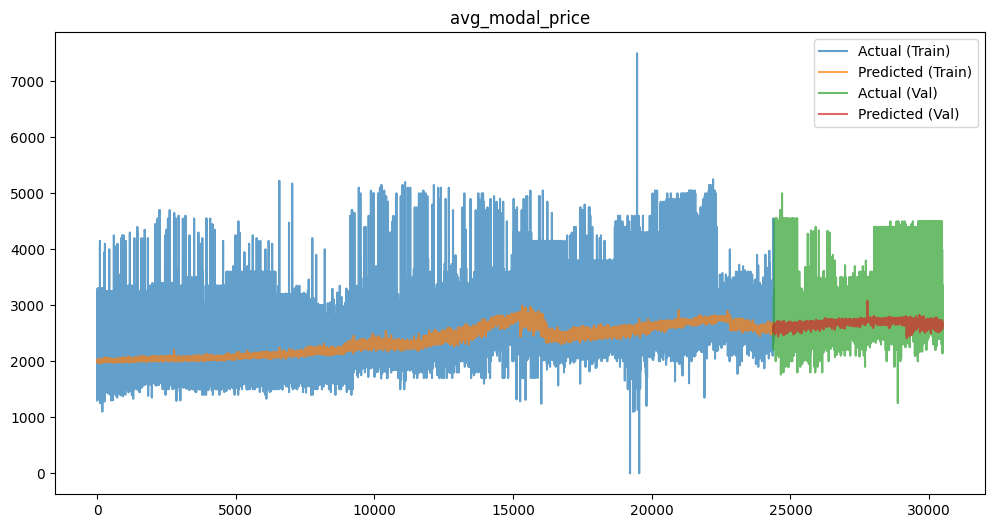

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


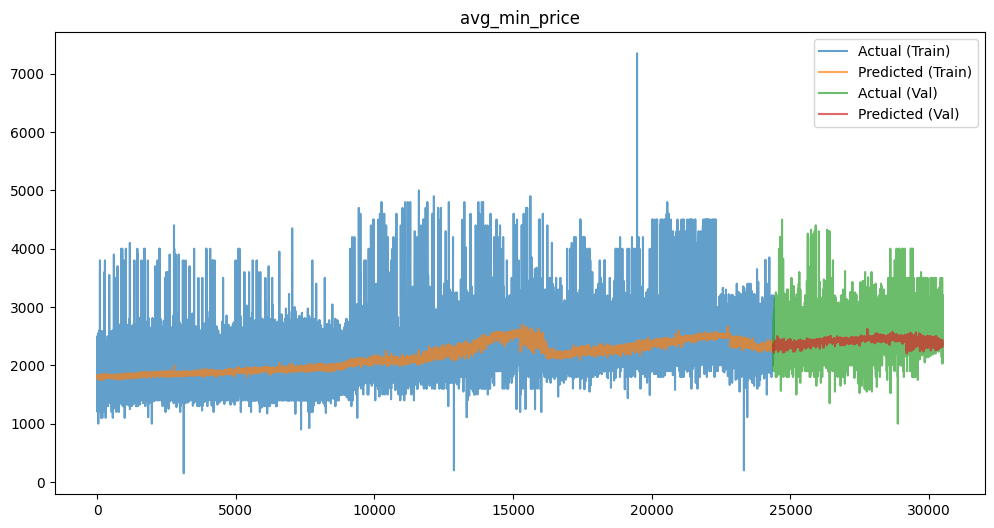

763/763 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


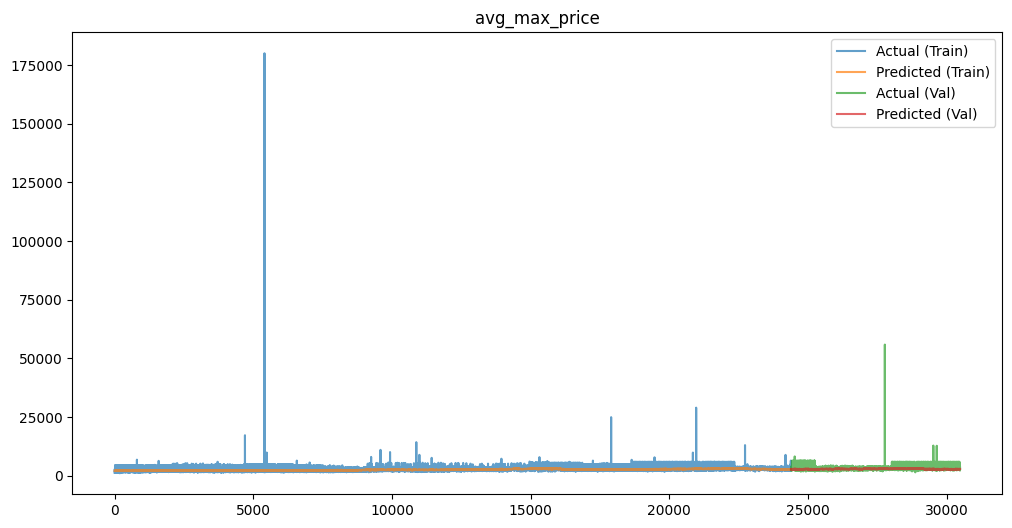

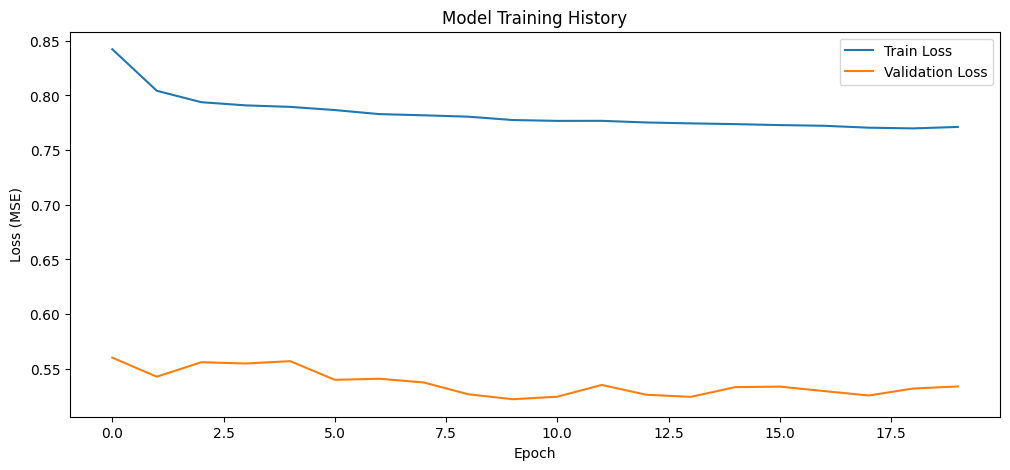

In [57]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --------------------------
# 1. Data Preparation
# --------------------------
# Use existing preprocessed dataframe (df)
target_cols = ['avg_modal_price', 'avg_min_price', 'avg_max_price']  # Ensure target columns are defined
print("Data Summary:")
print(df[target_cols].describe())

feature_cols = [col for col in df.columns if col not in target_cols]

# Handle remaining NaNs in lag features
df['modal_price_lag1'] = df['modal_price_lag1'].ffill()
df['rolling_modal_mean'] = df['rolling_modal_mean'].interpolate()

# Verify no NaNs remain
assert df[feature_cols].isna().sum().sum() == 0, "NaN values still present in features"

# --------------------------
# 2. Feature Scaling
# --------------------------
# Separate scalers for features and each target
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(df[feature_cols])

target_scalers = {col: StandardScaler() for col in target_cols}
y_scaled = np.column_stack([
    target_scalers[col].fit_transform(df[[col]].values) 
    for col in target_cols
])

# --------------------------
# 3. Sequence Creation
# --------------------------
def create_sequences(X, y, seq_length=10):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i:i+seq_length])
        ys.append(y[i+seq_length])
    return np.array(Xs), np.array(ys)

SEQ_LENGTH = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, SEQ_LENGTH)

# --------------------------
# 4. Train-Validation Split (Temporal)
# --------------------------
split_idx = int(0.8 * len(X_seq))
X_train, X_val = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_val = y_seq[:split_idx], y_seq[split_idx:]

# --------------------------
# 5. Optimized Model Architecture
# --------------------------
model = Sequential([
    LSTM(64, 
         input_shape=(SEQ_LENGTH, X_seq.shape[2]),
         kernel_initializer='glorot_uniform',
         dropout=0.1,
         recurrent_dropout=0.05),
    Dense(32, activation='relu'),
    Dense(3, activation='linear')
])

# --------------------------
# 6. Learning Rate Schedule
# --------------------------
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=1000,
    decay_rate=0.9
)

# --------------------------
# 7. Model Compilation
# --------------------------
model.compile(
    optimizer=Adam(learning_rate=lr_schedule, clipnorm=0.5),
    loss='mse',
    metrics=['mae']
)

# --------------------------
# 8. Training Configuration
# --------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_lstm_model.h5',
    monitor='val_mae',
    save_best_only=True,
    mode='min'
)

# --------------------------
# 9. Model Training
# --------------------------
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=128,
    shuffle=False,
    callbacks=[early_stop, checkpoint]
)

# --------------------------
# 10. Model Evaluation
# --------------------------
def inverse_transform_targets(y_scaled):
    """Inverse transform scaled predictions"""
    return np.column_stack([
        target_scalers[col].inverse_transform(y_scaled[:, i:i+1])
        for i, col in enumerate(target_cols)
    ])

def evaluate_model(model, X, y_scale, original_y):
    """Evaluate model performance with proper inverse scaling"""
    y_pred_scaled = model.predict(X)
    y_pred = inverse_transform_targets(y_pred_scaled)
    
    metrics = {}
    for i, col in enumerate(target_cols):
        metrics[f'{col}_RMSE'] = np.sqrt(mean_squared_error(
            original_y[:, i], y_pred[:, i]))
        metrics[f'{col}_MAE'] = mean_absolute_error(original_y[:, i], y_pred[:, i])  # Fixed parenthesis
        metrics[f'{col}_R2'] = r2_score(original_y[:, i], y_pred[:, i])
    return metrics

# Get original y values (without sequence offset)
y_train_orig = df[target_cols].values[SEQ_LENGTH:split_idx+SEQ_LENGTH]
y_val_orig = df[target_cols].values[split_idx+SEQ_LENGTH:]

print("\nTraining Metrics:")
train_metrics = evaluate_model(model, X_train, y_train, y_train_orig)
print(train_metrics)

print("\nValidation Metrics:")
val_metrics = evaluate_model(model, X_val, y_val, y_val_orig)
print(val_metrics)

# --------------------------
# 11. Visualization
# --------------------------
def plot_results(col_idx):
    """Plot actual vs predicted for a target column"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Training data
    train_pred = inverse_transform_targets(model.predict(X_train))
    ax.plot(y_train_orig[:, col_idx], label='Actual (Train)', alpha=0.7)
    ax.plot(train_pred[:, col_idx], label='Predicted (Train)', alpha=0.7)
    
    # Validation data
    val_pred = inverse_transform_targets(model.predict(X_val))
    ax.plot(range(len(y_train_orig), len(y_train_orig)+len(y_val_orig)), 
            y_val_orig[:, col_idx], label='Actual (Val)', alpha=0.7)
    ax.plot(range(len(y_train_orig), len(y_train_orig)+len(y_val_orig)), 
            val_pred[:, col_idx], label='Predicted (Val)', alpha=0.7)
    
    ax.set_title(target_cols[col_idx])
    ax.legend()
    plt.show()

for i in range(3):
    plot_results(i)

# Plot training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.show()


aarima

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' wa

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=32.08 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=480366.341, Time=0.30 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=471629.059, Time=2.72 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=14.71 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=480364.342, Time=0.15 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=471627.347, Time=0.62 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=471629.058, Time=2.33 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=471631.059, Time=2.95 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=468134.945, Time=0.81 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=468136.452, Time=3.18 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=468136.451, Time=3.04 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=468138.453, Time=4.25 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=466266.068, Time=1.24 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=466267.446, Time=3.67 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=466267.449, Time=3.21 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=466269.445, Time=4.05 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[12] intercept   : AIC=464940.158, Time=1.47 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,0)[12] intercept   : AIC=464941.203, Time=4.89 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,1)[12] intercept   : AIC=464941.206, Time=3.89 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,1)[12] intercept   : AIC=464943.202, Time=5.34 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[12] intercept   : AIC=464071.025, Time=2.24 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(1,0,0)[12] intercept   : AIC=464071.984, Time=5.47 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,1)[12] intercept   : AIC=464071.989, Time=3.60 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(1,0,1)[12] intercept   : AIC=464073.983, Time=4.98 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=17.23 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=18.59 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[12]             : AIC=464069.028, Time=1.09 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(1,0,0)[12]             : AIC=464069.987, Time=2.94 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,1)[12]             : AIC=464069.992, Time=1.50 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(1,0,1)[12]             : AIC=464071.986, Time=2.66 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[12]             : AIC=464938.160, Time=0.86 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[12]             : AIC=inf, Time=11.91 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[12]             : AIC=inf, Time=8.97 sec

Best model:  ARIMA(5,1,0)(0,0,0)[12]          
Total fit time: 177.036 seconds

Forecast for avg_modal_price:
30499    2702.559695
30500    2661.942467
30501    2681.750508
30502    2768.268870
30503    2798.604134
30504    2829.063429
30505    2740.932064
30506    2746.112615
30507    2759.932795
30508    2773.417704
30509    2775.387897
30510    2771.033151
dtype: float64


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\

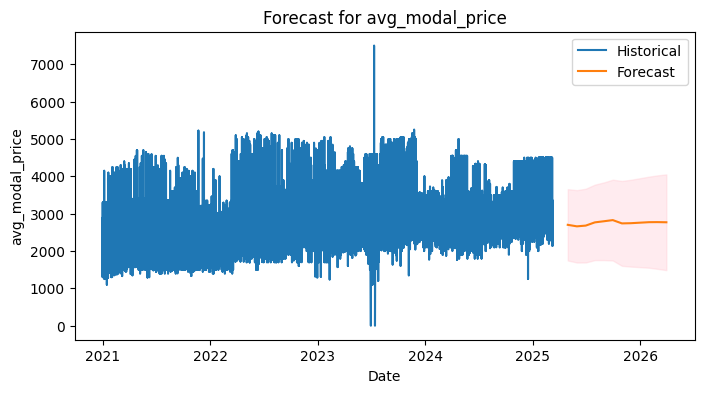

C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' wa

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=30.08 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=464633.732, Time=0.30 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=455974.403, Time=2.73 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=12.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=464631.732, Time=0.13 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=455972.958, Time=0.59 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=455974.396, Time=2.22 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=455976.416, Time=2.57 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=452363.861, Time=0.86 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=452364.424, Time=3.21 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=452364.409, Time=2.58 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=452366.441, Time=3.70 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=450492.795, Time=1.10 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=450493.330, Time=3.59 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=450493.320, Time=3.24 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=450495.341, Time=4.48 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[12] intercept   : AIC=449165.898, Time=1.33 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,0)[12] intercept   : AIC=449165.264, Time=4.95 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(2,0,0)[12] intercept   : AIC=449166.804, Time=19.20 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,1)[12] intercept   : AIC=449167.278, Time=6.91 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,1)[12] intercept   : AIC=449165.244, Time=5.30 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,2)[12] intercept   : AIC=449166.858, Time=17.87 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,0,2)[12] intercept   : AIC=449168.816, Time=22.93 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,1)[12] intercept   : AIC=448257.119, Time=5.87 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[12] intercept   : AIC=448257.804, Time=2.11 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(1,0,1)[12] intercept   : AIC=448259.140, Time=7.17 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,2)[12] intercept   : AIC=448258.980, Time=15.93 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(1,0,0)[12] intercept   : AIC=448257.131, Time=7.00 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(1,0,2)[12] intercept   : AIC=448260.952, Time=14.52 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=57.32 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=39.15 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,1)[12]             : AIC=448255.124, Time=2.12 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[12]             : AIC=448255.809, Time=0.89 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(1,0,1)[12]             : AIC=448257.145, Time=2.72 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,2)[12]             : AIC=448256.985, Time=6.34 sec


C:\Users\Shiva\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MemoryError: Unable to allocate 75.4 MiB for an array with shape (18, 18, 30500) and data type float64

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Assuming df already exists with the following columns:
# 'year', 'month', 'date', 'avg_modal_price', 'avg_min_price', 'avg_max_price', etc.

# Ensure a proper datetime index:
df['date_parsed'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['date'].astype(str),
    errors='coerce'
)
df = df.sort_values('date_parsed')
df.set_index('date_parsed', inplace=True)

# Define the target variables
targets = ['avg_modal_price', 'avg_min_price', 'avg_max_price']

# Set the forecast horizon (e.g., forecast 12 periods ahead)
forecast_horizon = 12

# Dictionary to store forecasts for each target
forecasts = {}

# Loop through each target variable and forecast using auto_arima
for target in targets:
    ts = df[target]
    # Fit an auto ARIMA model. Adjust m (seasonal period) as per your data frequency (e.g., m=12 for monthly).
    model = auto_arima(ts, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
    
    # Forecast future values
    fc, conf_int = model.predict(n_periods=forecast_horizon, return_conf_int=True)
    forecasts[target] = (fc, conf_int)
    
    print(f"\nForecast for {target}:")
    print(fc)
    
    # Plot the historical data and forecast
    plt.figure(figsize=(8, 4))
    plt.plot(ts, label='Historical')
    # Create forecast dates based on the index frequency
    forecast_index = pd.date_range(ts.index[-1], periods=forecast_horizon+1, freq='M')[1:]
    plt.plot(forecast_index, fc, label='Forecast')
    plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
    plt.title(f'Forecast for {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.show()
